In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Load the datasets**

In [ ]:
dataset=pd.read_csv('/content/gdrive/My Drive/publication/data.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,"(36.0, 40.0]",1,1,0.0,0.0,0,1,172,0,0.0,2,0
1,1,"(48.0, 52.0]",0,2,0.0,0.0,0,1,156,0,1.0,1,1
2,2,"(36.0, 40.0]",1,1,0.0,0.0,0,2,98,0,0.0,2,0
3,3,"(44.0, 48.0]",0,0,0.0,0.0,0,1,108,1,1.5,1,1
4,4,"(52.0, 56.0]",1,2,0.0,0.0,0,1,122,0,0.0,2,0


In [ ]:
dataset.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Age,"(36.0, 40.0]","(48.0, 52.0]","(36.0, 40.0]","(44.0, 48.0]","(52.0, 56.0]"
Sex,1,0,1,0,1
ChestPainType,1,2,1,0,2
RestingBP,0.0,0.0,0.0,0.0,0.0
Cholesterol,0.0,0.0,0.0,0.0,0.0
FastingBS,0,0,0,0,0
RestingECG,1,1,2,1,1
MaxHR,172,156,98,108,122
ExerciseAngina,0,0,0,1,0


In [ ]:
column = dataset.columns

In [ ]:
print(column)

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')


# **separating to dependent and dependent attributes**

*but you can also separate datasets into traning and testing sub-datasets using train_test_split from sklearn.model_selection*

In [ ]:
y = dataset.HeartDisease                          # M or B
list = ['Unnamed: 0']
x = dataset.drop(list,axis = 1 )
x=x.drop("HeartDisease",axis=1)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,"(36.0, 40.0]",1,1,0.0,0.0,0,1,172,0,0.0,2
1,"(48.0, 52.0]",0,2,0.0,0.0,0,1,156,0,1.0,1
2,"(36.0, 40.0]",1,1,0.0,0.0,0,2,98,0,0.0,2
3,"(44.0, 48.0]",0,0,0.0,0.0,0,1,108,1,1.5,1
4,"(52.0, 56.0]",1,2,0.0,0.0,0,1,122,0,0.0,2


In [ ]:
lb=LabelEncoder()
x['Age']=lb.fit_transform(x['Age'])

In [ ]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,2,1,1,0.0,0.0,0,1,172,0,0.0,2
1,5,0,2,0.0,0.0,0,1,156,0,1.0,1
2,2,1,1,0.0,0.0,0,2,98,0,0.0,2
3,4,0,0,0.0,0.0,0,1,108,1,1.5,1
4,6,1,2,0.0,0.0,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,4,1,3,0.0,0.0,0,1,132,0,1.2,1
914,9,1,0,0.0,0.0,1,1,141,0,3.4,1
915,7,1,0,0.0,0.0,0,1,115,1,1.2,1
916,7,0,1,0.0,0.0,0,0,174,0,0.0,1


## **Most  popular techniques of feature selection in machine learning are:**
1.   Filter methods
2.   Wrapper method
3.   Embedded methods

# **1 Filter methods**

**Step:1 Removing Constant features**

In [ ]:
x.shape

(918, 11)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
data_constant = constant_filter.fit_transform(x)
print(data_constant.shape)

(918, 9)


In [ ]:
#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in x.columns
                    if column not in x.columns[constant_filter.get_support()]]
print(constant_columns)

['RestingBP', 'Cholesterol']


In [ ]:
x = x.drop(constant_columns,axis=1)

In [ ]:
x.shape

(918, 9)

**Step 2: Removing Quasi-Constant Features**


In [ ]:
quasi_filter = VarianceThreshold(threshold=0.01)

In [ ]:
data_qcons = quasi_filter.fit_transform(x)
print(data_qcons)

[[2.  1.  1.  ... 0.  0.  2. ]
 [5.  0.  2.  ... 0.  1.  1. ]
 [2.  1.  1.  ... 0.  0.  2. ]
 ...
 [7.  1.  0.  ... 1.  1.2 1. ]
 [7.  0.  1.  ... 0.  0.  1. ]
 [2.  1.  2.  ... 0.  0.  2. ]]


In [ ]:
#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in x.columns
                    if column not in x.columns[quasi_filter.get_support()]]

In [ ]:
x = x.drop(qcons_columns,axis=1)

In [ ]:
x.shape

(918, 9)

 **3 Removing Duplicate Columns**


In [ ]:
Transpose_x=x.T
print(Transpose_x)

                  0      1     2      3      4      5      6      7      8    \
Age               2.0    5.0   2.0    4.0    6.0    2.0    4.0    6.0    2.0   
Sex               1.0    0.0   1.0    0.0    1.0    1.0    0.0    1.0    1.0   
ChestPainType     1.0    2.0   1.0    0.0    2.0    2.0    1.0    1.0    0.0   
FastingBS         0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
RestingECG        1.0    1.0   2.0    1.0    1.0    1.0    1.0    1.0    1.0   
MaxHR           172.0  156.0  98.0  108.0  122.0  170.0  170.0  142.0  130.0   
ExerciseAngina    0.0    0.0   0.0    1.0    0.0    0.0    0.0    0.0    1.0   
Oldpeak           0.0    1.0   0.0    1.5    0.0    0.0    0.0    0.0    1.5   
ST_Slope          2.0    1.0   2.0    1.0    2.0    2.0    2.0    2.0    1.0   

                  9    ...    908    909    910   911    912    913    914  \
Age               4.0  ...    8.0    8.0    3.0   7.0    7.0    4.0    9.0   
Sex               0.0  ...    1.0    0.0   

In [ ]:
# check duplication
Transpose_x.duplicated().sum()

0

In [ ]:
Transpose_x.duplicated()

Age               False
Sex               False
ChestPainType     False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
dtype: bool

In [ ]:
#Dropping Duplicated method using drop_duplicates()
x = Transpose_x.drop_duplicates(keep='first').T
x.shape

(918, 9)

In [ ]:
x.corr()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Age,1.000000,0.051487,-0.078888,0.191601,-0.009782,-0.382048,0.211379,0.252972,-0.267595
Sex,0.051487,1.000000,-0.126559,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693
ChestPainType,-0.078888,-0.126559,1.000000,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521
FastingBS,0.191601,0.120076,-0.073151,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774
RestingECG,-0.009782,0.071552,-0.072537,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778
MaxHR,-0.382048,-0.189186,0.289123,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419
ExerciseAngina,0.211379,0.190664,-0.354727,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706
Oldpeak,0.252972,0.105734,-0.177377,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921
ST_Slope,-0.267595,-0.150693,0.213521,-0.175774,-0.006778,0.343419,-0.428706,-0.501921,1.000000


**4. correlation**

In [ ]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col_1=correlation(x,0.80)
print('Correlated columns:',col_1)

Correlated columns: set()


In [ ]:
#remove correlated columns
x.drop(columns=col_1,axis=1,inplace=True)
#lets check the shape of training set and test set.
x.shape

(918, 9)

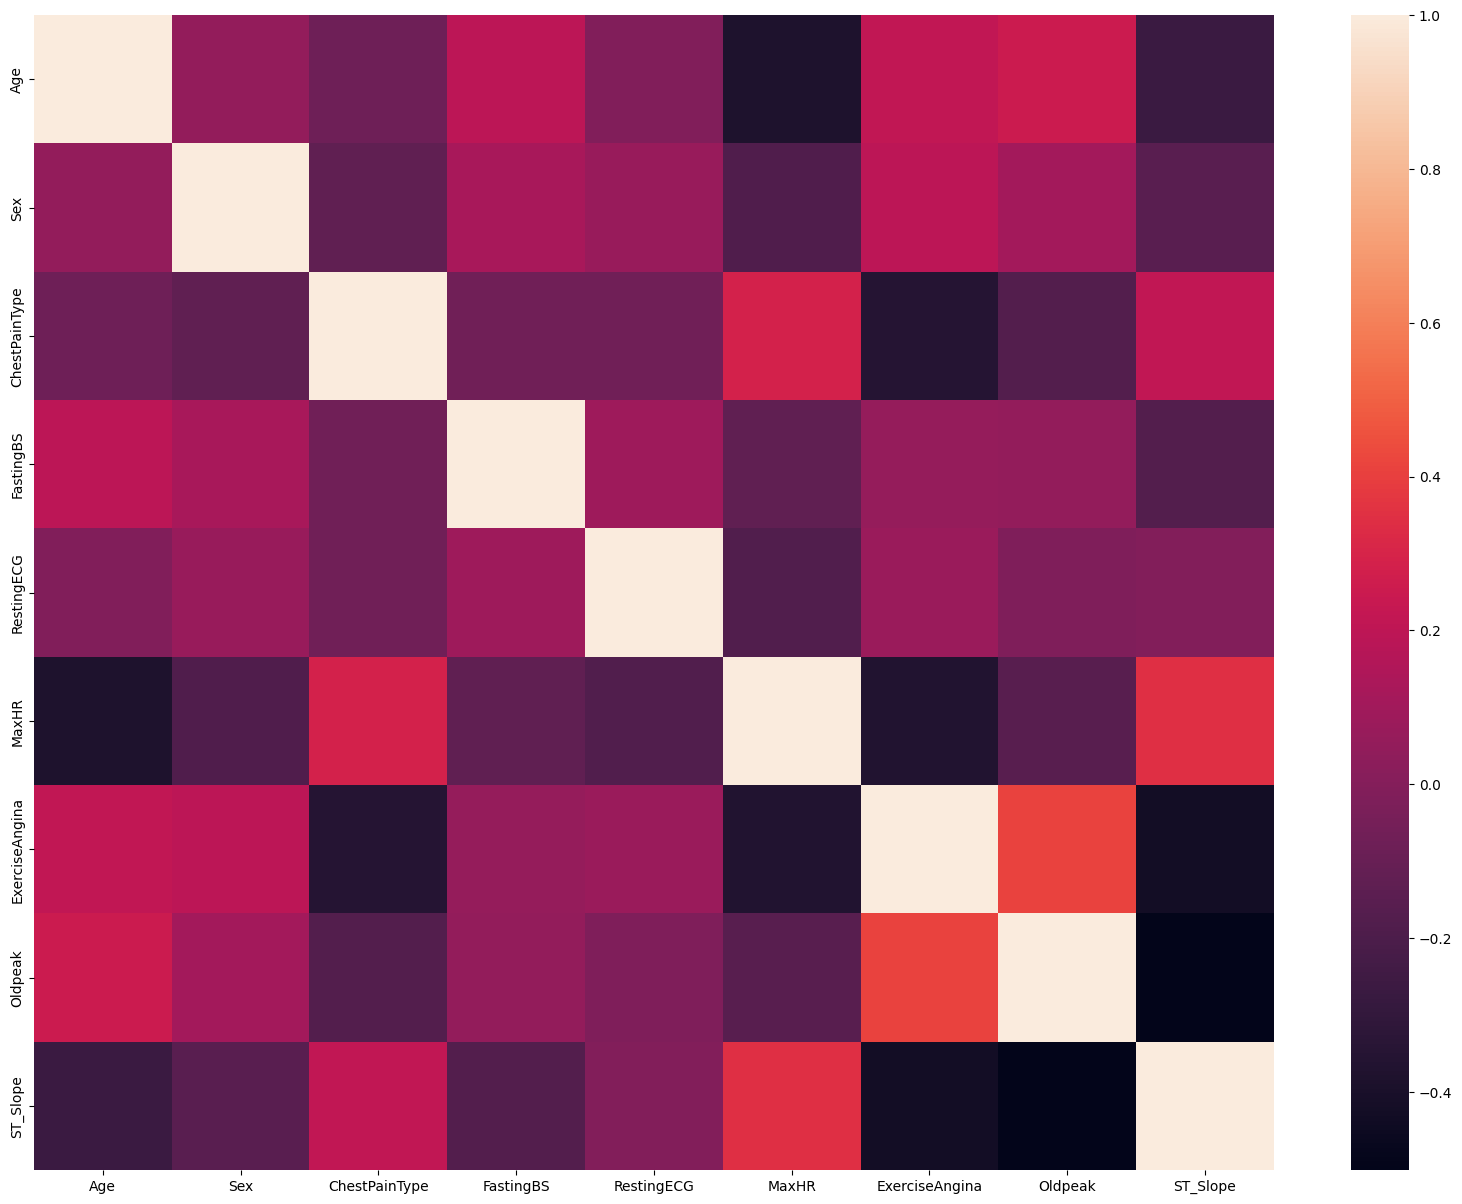

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr())
plt.show()

In [ ]:
x.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,2.0,1.0,1.0,0.0,1.0,172.0,0.0,0.0,2.0
1,5.0,0.0,2.0,0.0,1.0,156.0,0.0,1.0,1.0
2,2.0,1.0,1.0,0.0,2.0,98.0,0.0,0.0,2.0
3,4.0,0.0,0.0,0.0,1.0,108.0,1.0,1.5,1.0
4,6.0,1.0,2.0,0.0,1.0,122.0,0.0,0.0,2.0


***Mutual Information or Information Gain***

In [ ]:
mi = mutual_info_classif(x, y);

<Axes: >

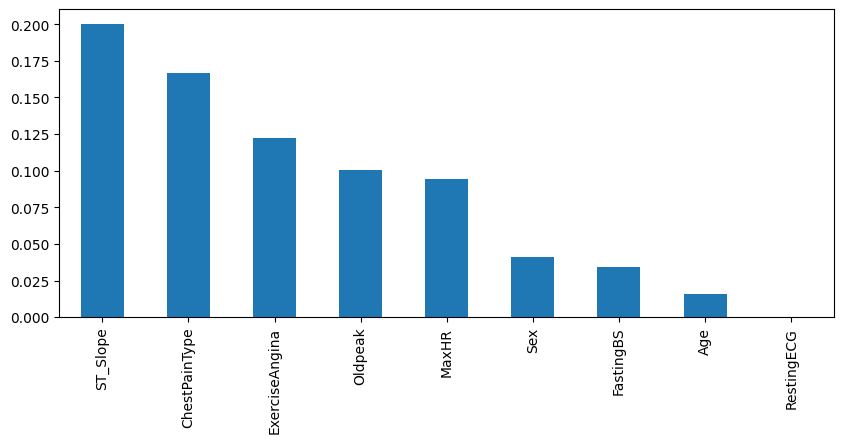

In [ ]:
mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [ ]:
# select top 6 features
sel_ = SelectKBest(mutual_info_classif, k=9).fit(x, y)
X_train_infoGian=x.columns[sel_.get_support()]

In [ ]:
X_train_infoGian

Index(['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

# **2. wrapper**

**1. forward feature selection**

In [ ]:
sfs_rf = SFS(RandomForestClassifier(n_estimators=200,criterion="entropy"),
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           cv=10,
           n_jobs=1
           )

In [ ]:
sfs_rf.fit(x,y)


[2024-03-11 13:43:01] Features: 1/6 -- score: 0.8134615384615385
[2024-03-11 13:43:38] Features: 2/6 -- score: 0.8134615384615385
[2024-03-11 13:44:16] Features: 3/6 -- score: 0.8156473960821786
[2024-03-11 13:44:46] Features: 4/6 -- score: 0.8255136168179646
[2024-03-11 13:45:10] Features: 5/6 -- score: 0.8287744863831821
[2024-03-11 13:45:38] Features: 6/6 -- score: 0.8255494505494505

SequentialFeatureSelector(cv=10,
                          estimator=RandomForestClassifier(criterion='entropy',
                                                           n_estimators=200),
                          k_features=(6, 6), scoring='accuracy', verbose=2)

In [ ]:
sfs_rf.k_feature_idx_

(1, 2, 3, 4, 6, 8)

In [ ]:
sfs_rf.k_feature_names_

('Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope')

***2. backward feature selection***

In [ ]:
backwardModel = SFS(RandomForestClassifier(n_estimators=200,criterion="entropy"),
           k_features=6,
           forward=False,
           verbose=2,
           cv=5,
           n_jobs=1
           )

In [ ]:
backwardModel.fit(x,y)


[2024-03-11 13:49:19] Features: 8/6 -- score: 0.833256117842718
[2024-03-11 13:49:37] Features: 7/6 -- score: 0.8354359705393206
[2024-03-11 13:49:57] Features: 6/6 -- score: 0.8343430743644571

SequentialFeatureSelector(estimator=RandomForestClassifier(criterion='entropy',
                                                           n_estimators=200),
                          forward=False, k_features=(6, 6), scoring='accuracy',
                          verbose=2)

In [ ]:
backwardModel.k_feature_idx_

(1, 2, 4, 5, 7, 8)

In [ ]:
backwardModel.k_feature_names_

('Sex', 'ChestPainType', 'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope')

# **3. Bi-directional elimination**

In [ ]:
bi_rf = SFS(RandomForestClassifier(n_estimators=200,criterion="entropy"),
           k_features=6,
           forward=True,
           floating=True,
           verbose=2,
           cv=5,
           n_jobs=1
           )

In [ ]:
bi_rf.fit(x.values,y.values)


[2024-03-12 13:40:14] Features: 1/6 -- score: 0.8135542884295557
[2024-03-12 13:40:25] Features: 2/6 -- score: 0.8135542884295557
[2024-03-12 13:40:37] Features: 3/6 -- score: 0.8135542884295557
[2024-03-12 13:40:49] Features: 4/6 -- score: 0.8135542884295557
[2024-03-12 13:41:01] Features: 5/6 -- score: 0.8124673319078166
[2024-03-12 13:41:18] Features: 5/6 -- score: 0.8419695889760039
[2024-03-12 13:41:31] Features: 6/6 -- score: 0.8506711808030412

SequentialFeatureSelector(estimator=RandomForestClassifier(criterion='entropy',
                                                           n_estimators=200),
                          floating=True, k_features=(6, 6), scoring='accuracy',
                          verbose=2)

# **4. Embedded Method**

In [ ]:
selection = SelectFromModel(LogisticRegression(C=1, penalty='l2'))

In [ ]:
selection.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(C=1))

In [ ]:
selected_features = x.columns[(selection.get_support())]
print(selected_features)

Index(['Sex', 'FastingBS', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [44]:
x.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]

Index([], dtype='object')